#Лабораторная работа 2.

#«Наивный байесовский» классификатор.

##Задание.

### 1. Загрузить таблицу Mushroom из репозитория UCI (любого источника) в объект DataFrame. Вычислить распределение значений категориальных признаков по классам (использовать pd.groupby). Визуализировать распределения.


### 2. Построить решающую функцию по каждой переменной на основе частот. Вычислить точность каждого решения (на той же обучающей выборке). Найти наиболее информативную переменную (с минимальным числом ошибок).

### 3. Построить «наивный» байесовский классификатор из sklearn. Оценить точность.

### 4. Самостоятельно реализовать метод, не используя готовый. Сравнить полученное решение с библиотечным. Добавить регуляризатор в оценки частот.

### 5. Применить метод логистической регрессии, использовав в качестве переменных оценки вероятностей, подвергнутые обратному логистическому преобразованию.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

## Дополнительная информация (памятка)

**Сигмоидная функция (или сигмоида):**
Сигмоидная функция — это S-образная кривая, которая принимает любое вещественное число и "сжимает" его в диапазон между 0 и 1. Она часто используется в логистической регрессии и нейронных сетях для прогнозирования вероятности.  σ(z) = 1 / (1 + e^(-z))

**Обратное логарифмическое преобразование (или логарифм отношения шансов):** Это преобразование, которое берет вероятность p и преобразует ее во вещественное число в диапазоне от **−∞** до
**+∞**. logit(p) = log(p/1-p)

**Сигмоида и логарифм отношения шансов** являются взаимно обратными функциями. Это означает, что если вы примените логарифмическое преобразование к вероятности, а затем примените сигмоидную функцию к результату, вы получите исходную вероятность. И наоборот, если вы примените сигмоидную функцию к числу, а затем примените логарифмическое преобразование к результату, вы получите исходное число.

**Частотные характеристики:** Это статистики, которые описывают, как часто каждое значение переменной (или признака) связано с каждым из классов. Например, если у нас есть переменная "Цвет" с возможными значениями "Красный", "Синий" и "Зеленый" и два класса "Класс1" и "Класс2", частотная характеристика может показать, что 70% красных объектов принадлежат "Классу1", а 30% - "Классу2".

**Решающая функция:** Это функция, которая принимает на вход значение переменной и выдает решение о принадлежности объекта к определенному классу. В нашем примере решающая функция может гласить: если объект "Красный", то с 70% вероятностью он принадлежит "Классу1".

**"Наивный" байесовский классификатор** — это алгоритм классификации, основанный на принципе максимальной вероятности и теореме Байеса. Основное предположение этого классификатора заключается в том, что признаки объекта независимы друг от друга при условии заданного класса. Именно из-за этого предположения он и называется "наивным".

**Теорема Байеса:** Она позволяет вычислить условную вероятность принадлежности объекта к определенному классу на основе его признаков.

**"Наивное"** предположение гласит, что признаки объекта независимы друг от друга при условии заданного класса.

**Регуляризатор частот:** Это метод, который позволяет добавить небольшое смещение к оценкам частот для предотвращения деления на ноль или получения экстремально низких/высоких оценок вероятности, особенно когда размер выборки мал. Например, в контексте классификации, если некоторый признак встречается очень редко или вообще не встречается в обучающей выборке, то без регуляризатора его вероятность будет равна 0 или 1. Регуляризатор частот позволяет "сгладить" такие вероятности, делая их менее крайними.

**Логистическая регрессия** — это статистический метод для анализа набора данных, в котором есть одна или несколько независимых переменных, которые определяют результат. Результат измеряется с помощью дихотомической переменной (два возможных результата). Это один из основных методов, используемых для задач бинарной классификации.

## Данные

In [2]:
column_names = ["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None, names=column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Задание 1

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
grouped = df.groupby('class').apply(lambda x: x.describe(include='all'))
grouped

class cap-shape cap-surface cap-color bruises  odor  \
class                                                              
e     count   4208      4208        4208      4208    4208  4208   
      unique     1         5           3        10       2     3   
      top        e         x           f         n       t     n   
      freq    4208      1948        1560      1264    2752  3408   
p     count   3916      3916        3916      3916    3916  3916   
      unique     1         5           4         8       2     7   
      top        p         x           y         n       f     f   
      freq    3916      1708        1740      1020    3292  2160   

             gill-attachment gill-spacing gill-size gill-color  ...  \
class                                                           ...   
e     count             4208         4208      4208       4208  ...   
      unique               2            2         2         10  ...   
      top                  f            c         b          w  ...   
      freq              4016         3008      3920        956  ...   
p     count             3916         3916      3916       3916  ...   
      unique               2            2         2         10  ...   
      top                  f            c         n          b  ...   
      freq              3898         3804      2224       1728  ...   

             stalk-surface-below-ring stalk-color-above-ring  \
class                                                          
e     count                      4208                   4208   
      unique                        4                      6   
      top                           s                      w   
      freq                       3400                   2752   
p     count                      3916                   3916   
      unique                        4                      6   
      top                           k                      w   
      freq                       2160                   1712   

             stalk-color-below-ring veil-type veil-color ring-number  \
class                                                                  
e     count                    4208      4208       4208        4208   
      unique                      6         1          3           2   
      top                         w         p          w           o   
      freq                     2704      4208       4016        3680   
p     count                    3916      3916       3916        3916   
      unique                      6         1          2           3   
      top                         w         p          w           o   
      freq                     1680      3916       3908        3808   

             ring-type spore-print-color population habitat  
class                                                        
e     count       4208              4208       4208    4208  
      unique         3                 8          6       7  
      top            p                 n          v       d  
      freq        3152              1744       1192    1880  
p     count       3916              3916       3916    3916  
      unique         4                 5          4       6  
      top            e                 w          v       d  
      freq        1768              1812       2848    1268  

[8 rows x 23 columns]

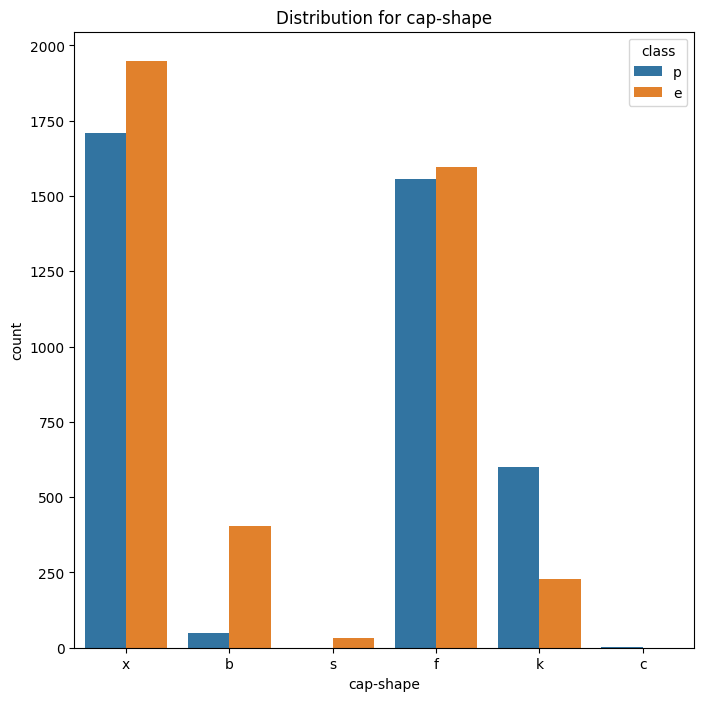

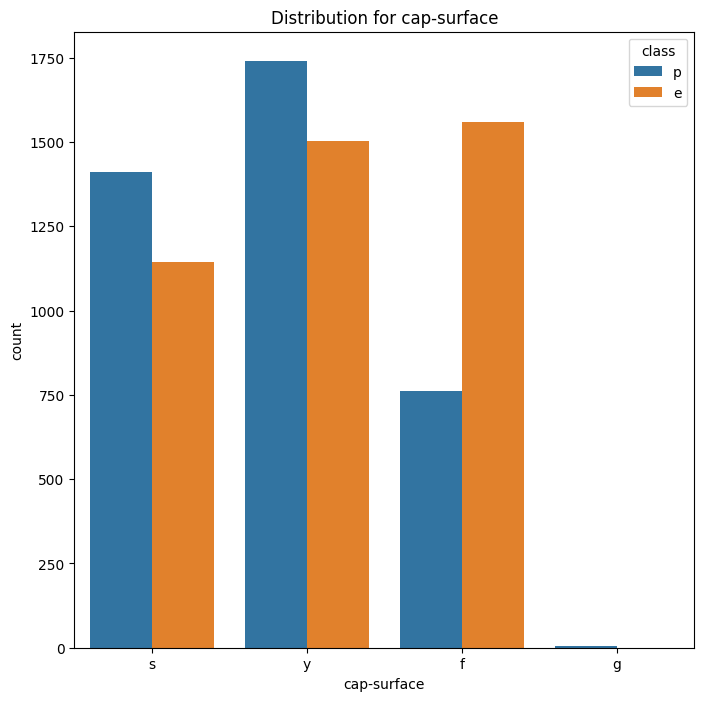

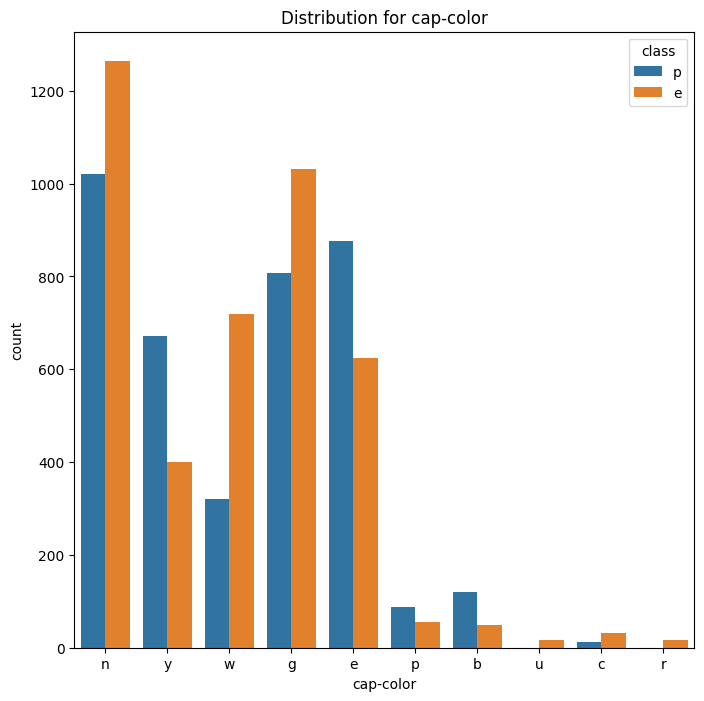

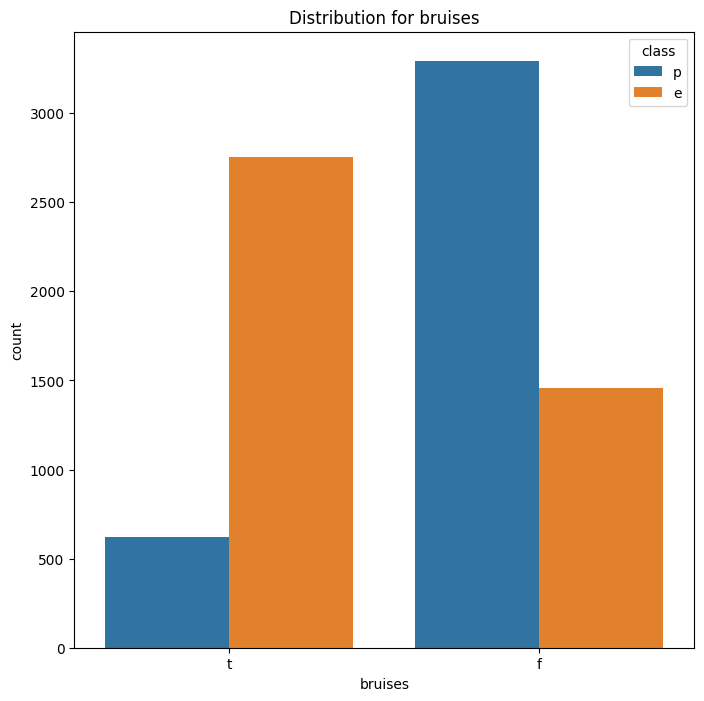

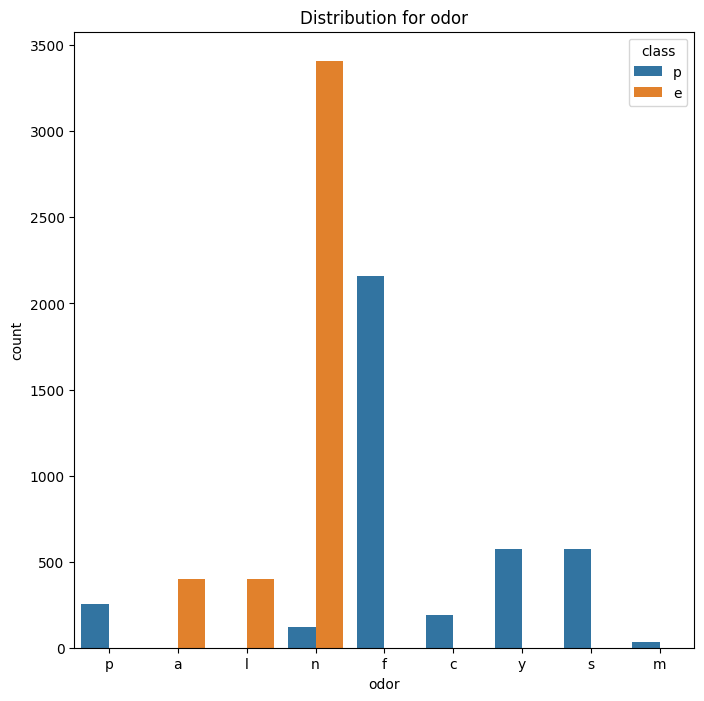

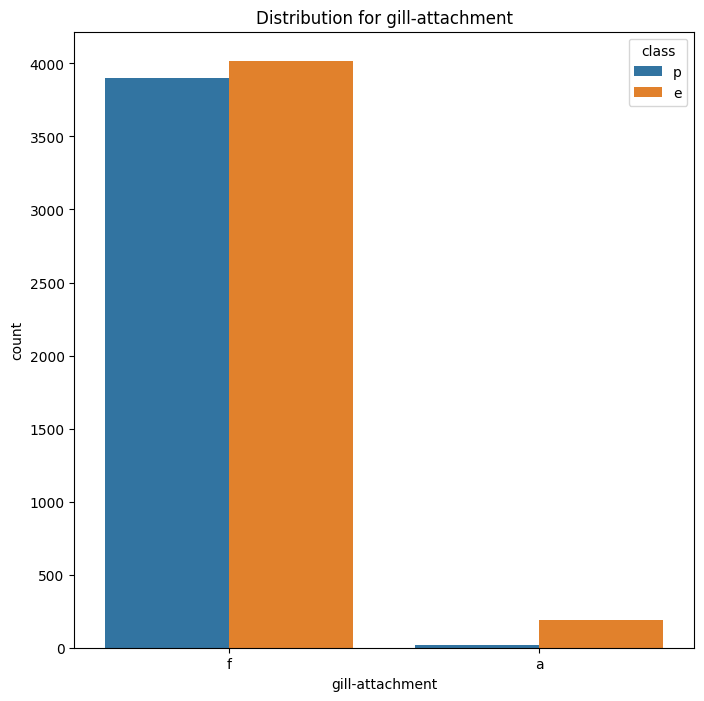

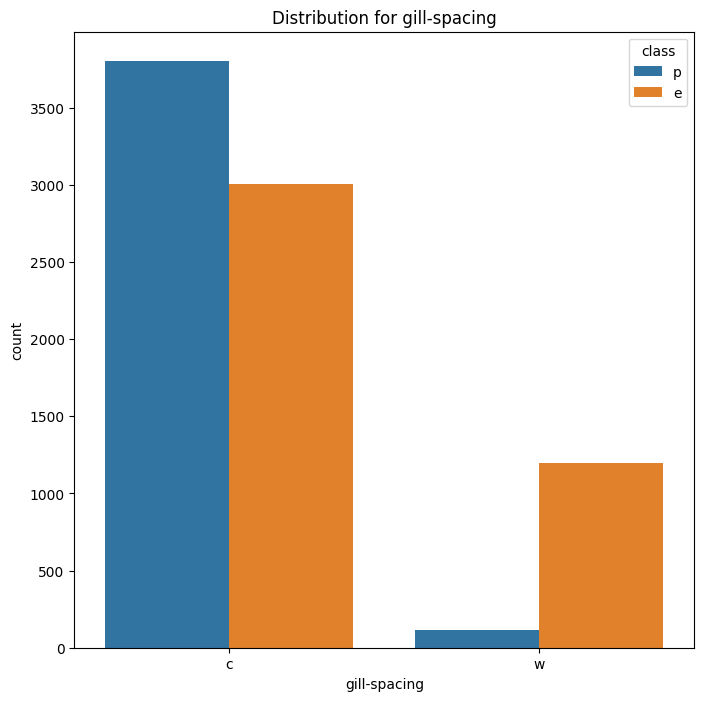

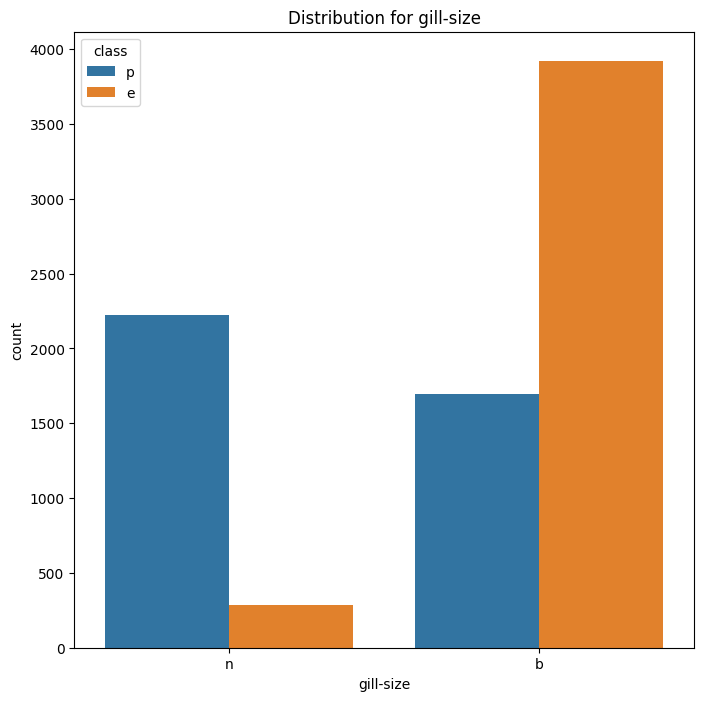

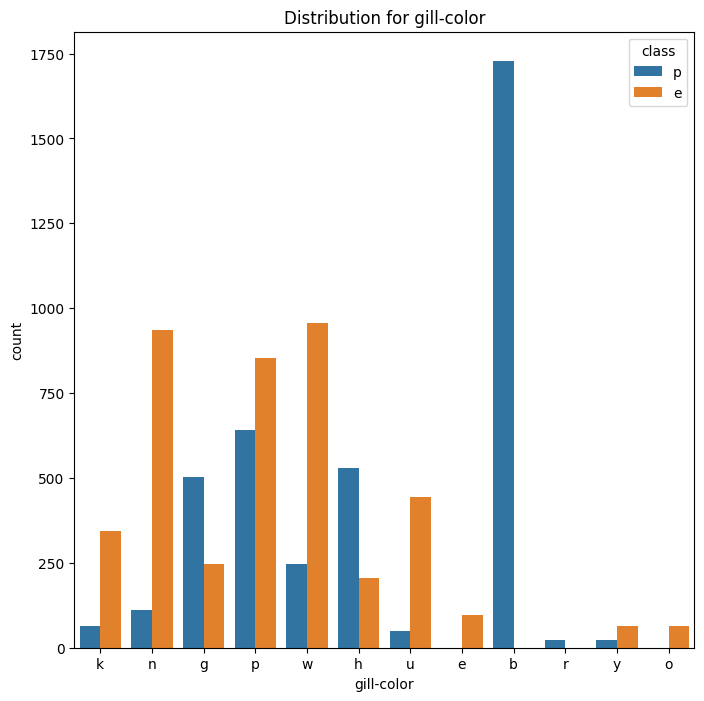

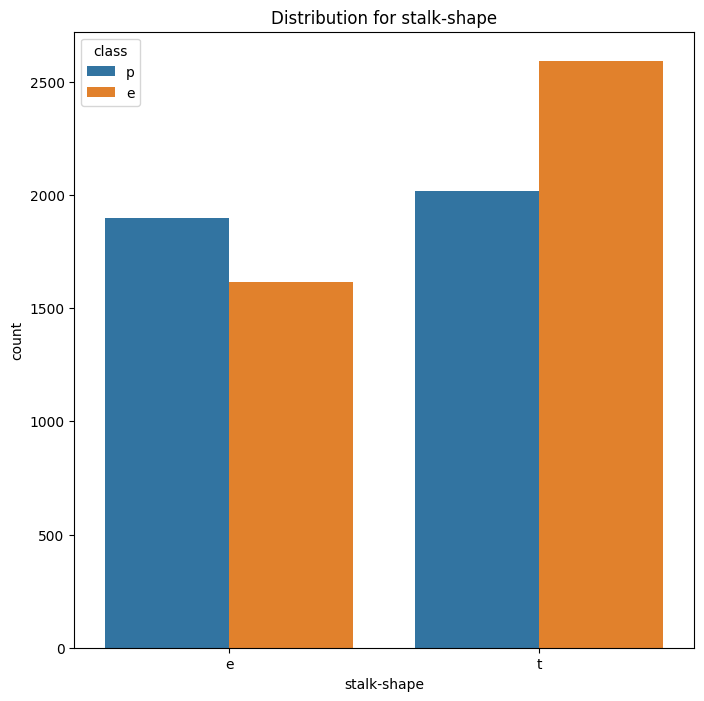

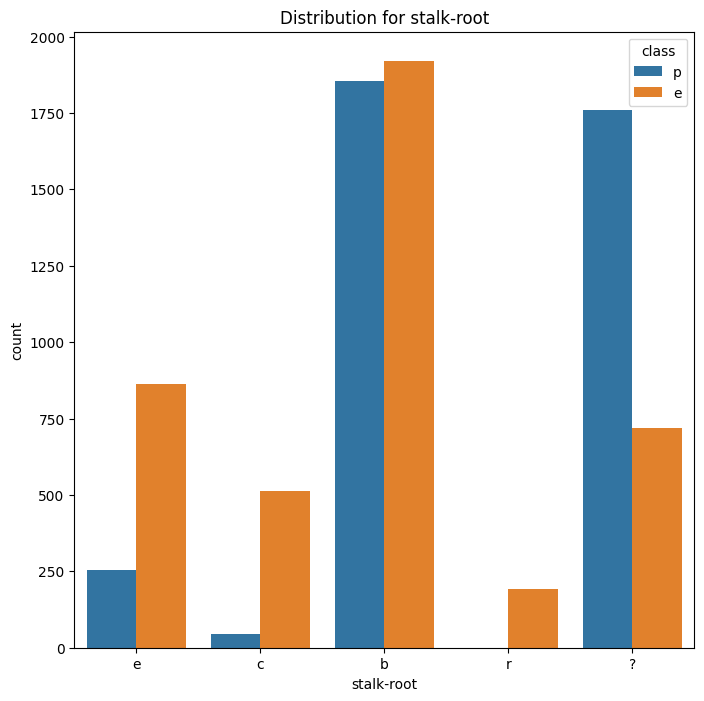

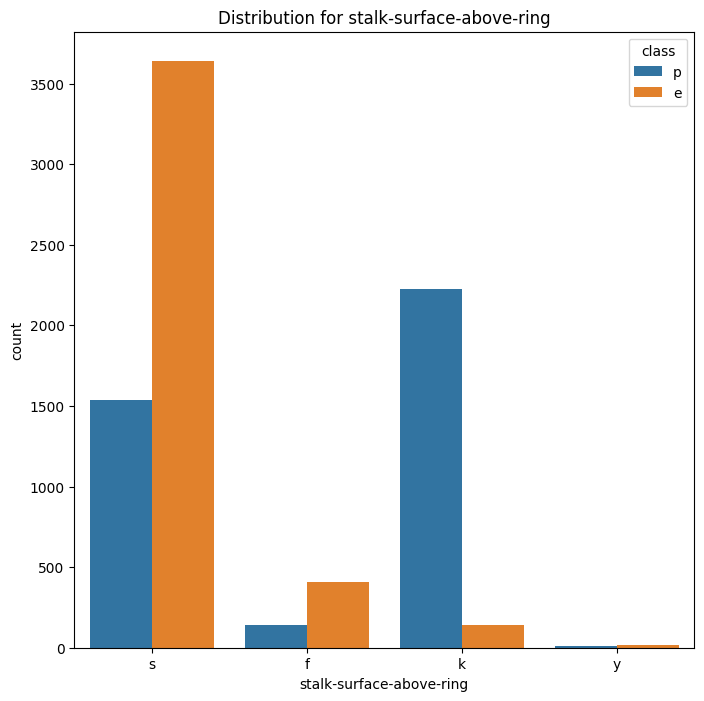

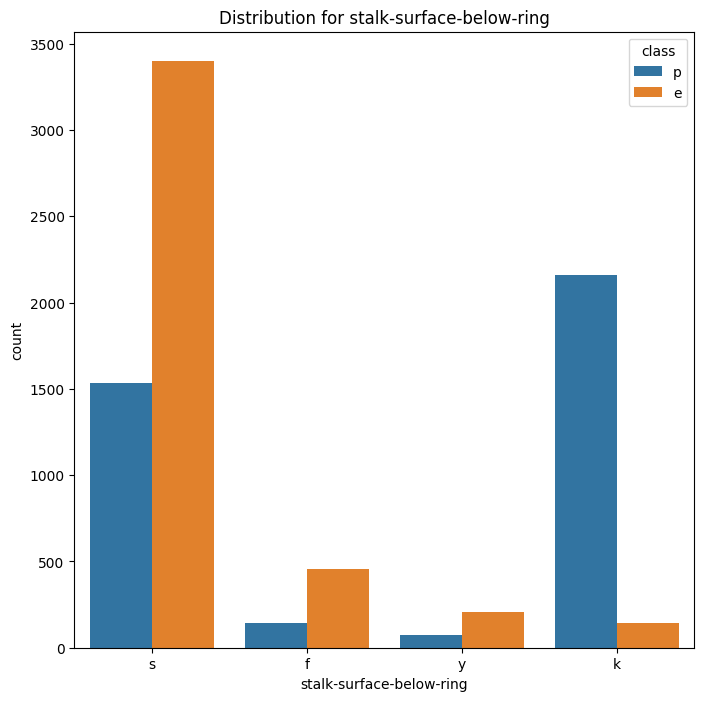

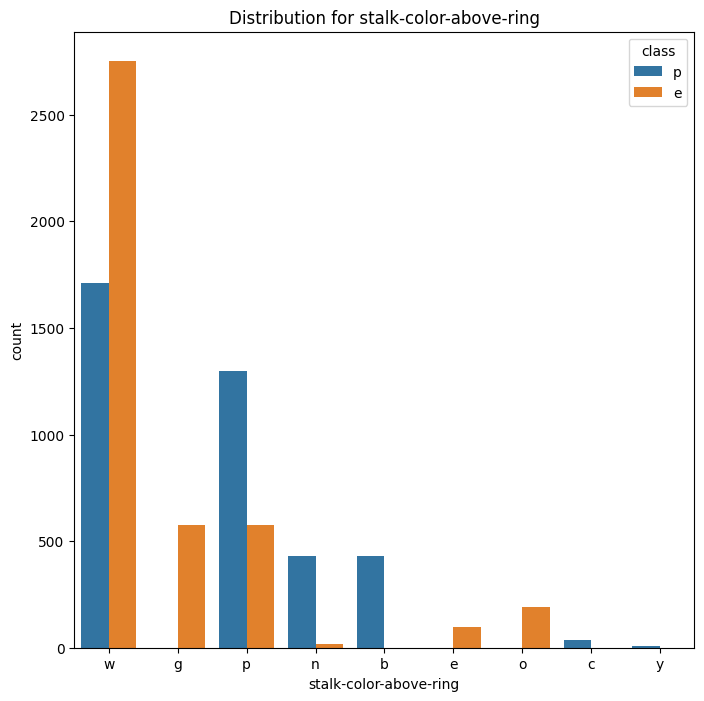

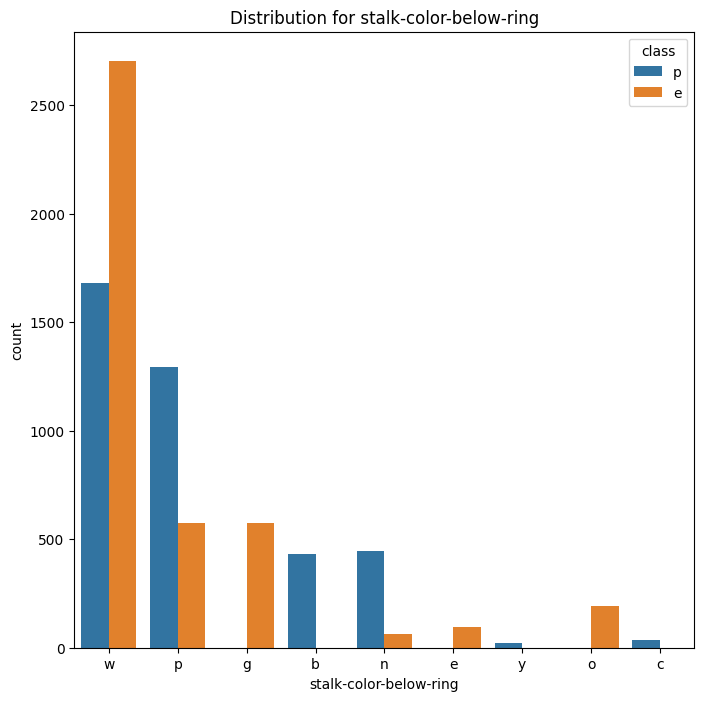

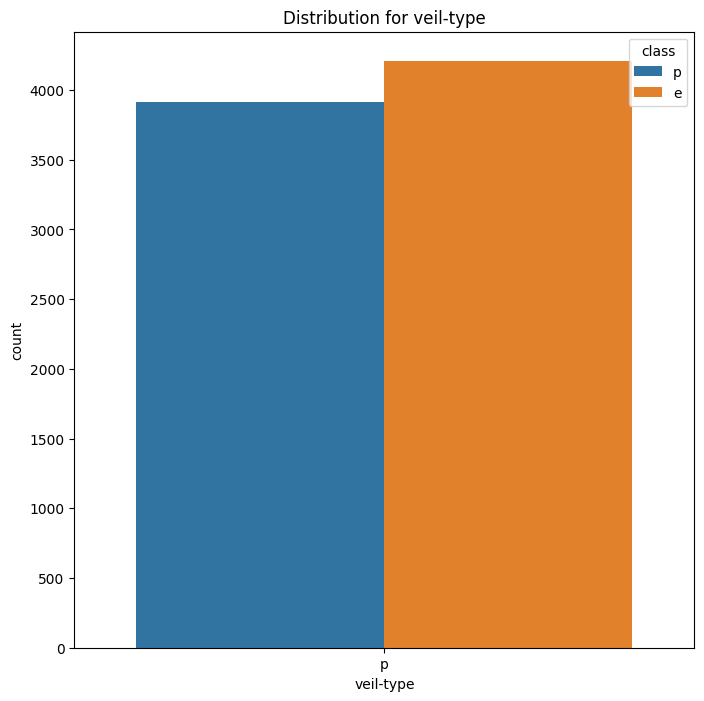

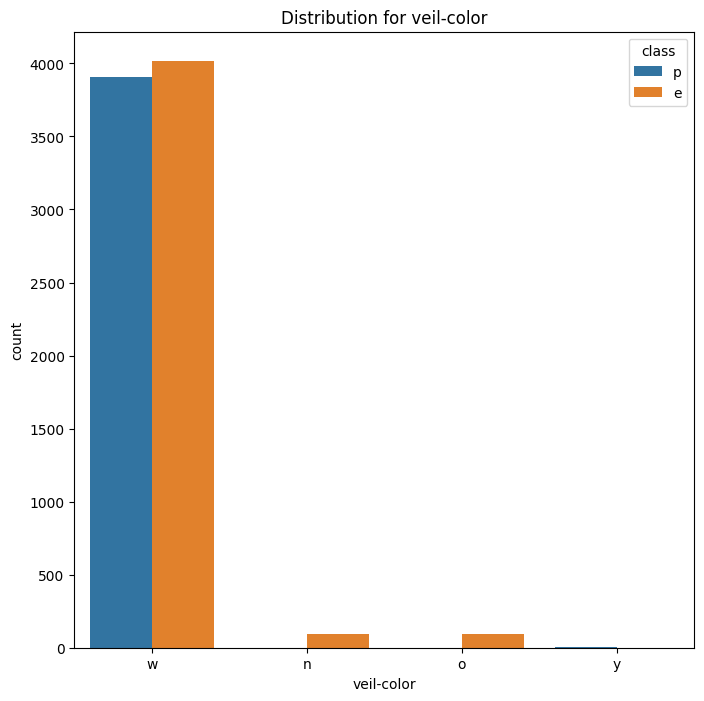

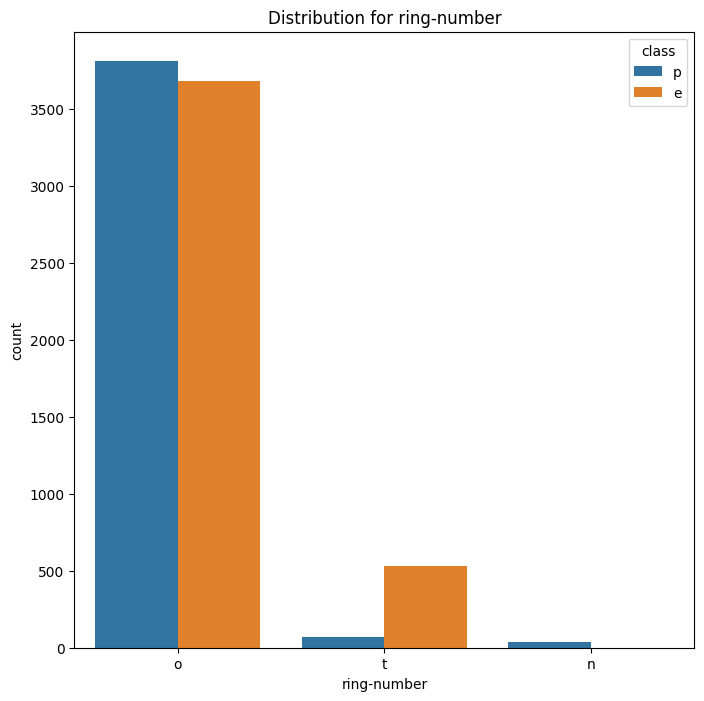

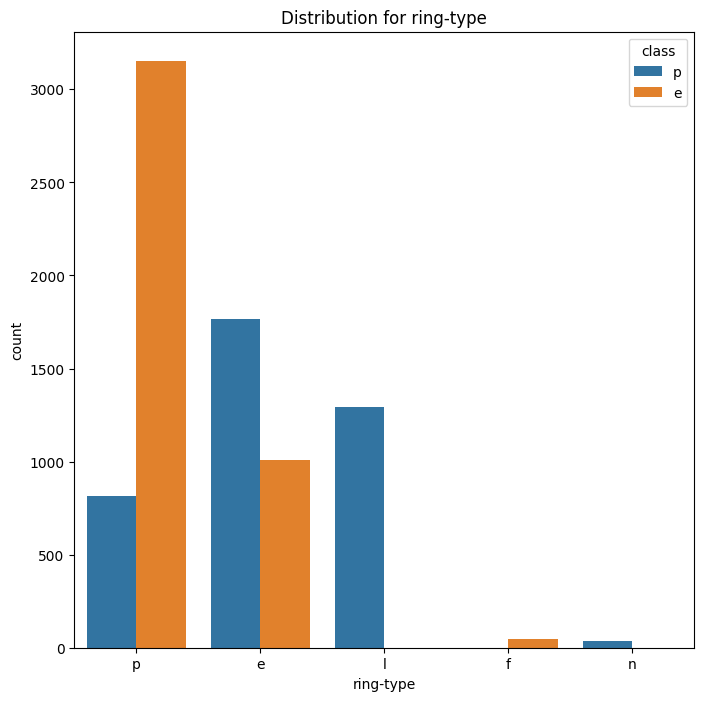

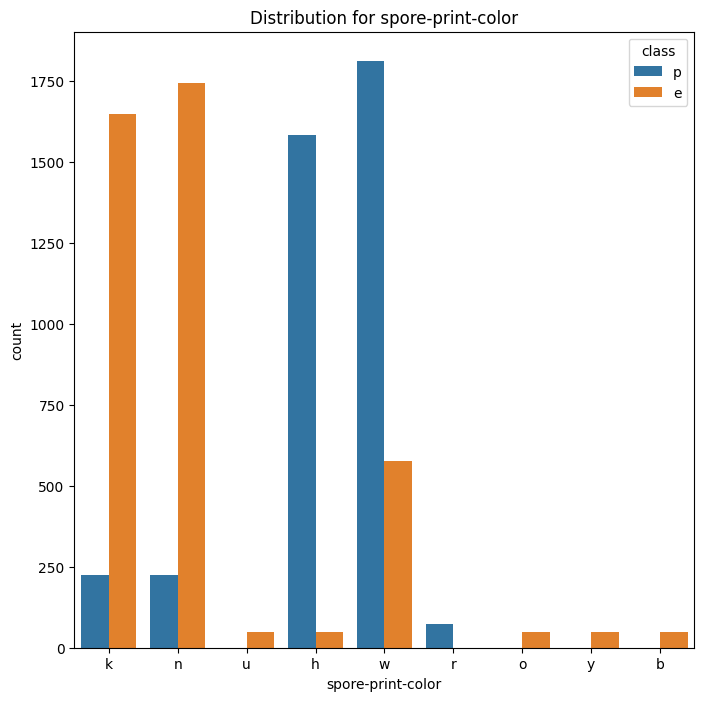

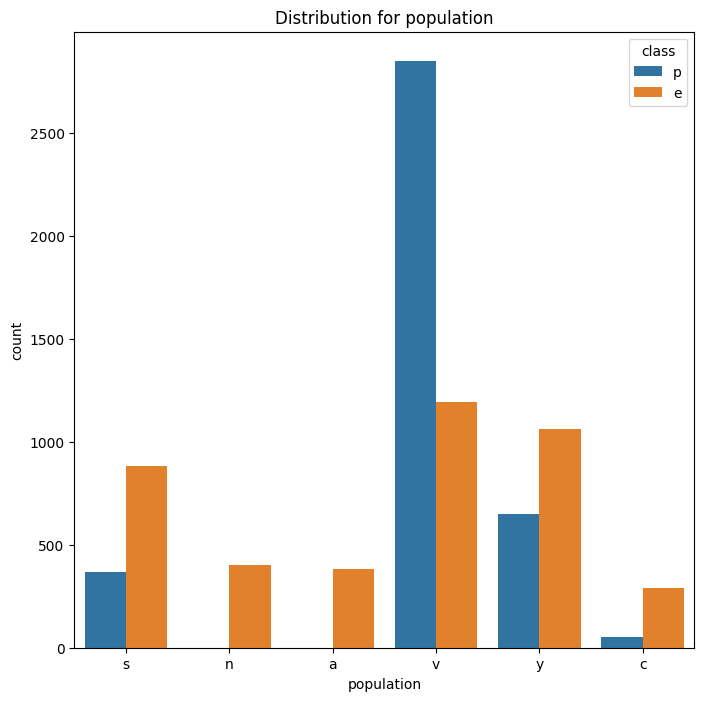

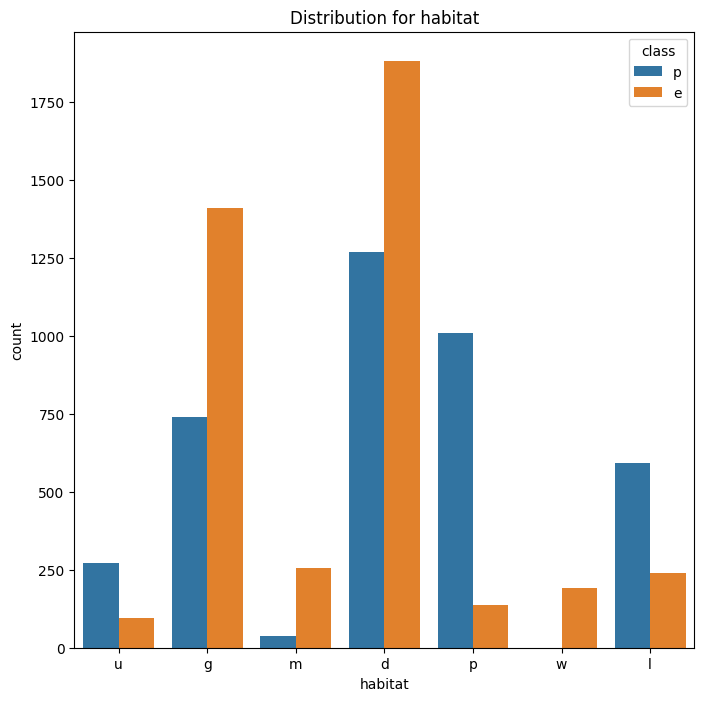

In [5]:
for column in df.columns:
    if column != 'class':
        plt.figure(figsize=(8, 8))
        # Создаем столбчатую диаграмму (график) для текущей колонки, разделяя по классам
        sns.countplot(data=df, x=column, hue='class')
        plt.title(f'Distribution for {column}')
        plt.show()

## Задание 2

In [6]:
# Подсчитываем количество уникальных значений в колонке 'class'
cnt = df['class'].value_counts()
# Вычисляем вероятность появления значения 'p' в колонке 'class'
p0 = cnt['p']/cnt.sum()
# Вычисляем логарифм отношения шансов (log odds) для значения 'p'
z0 = np.log(p0) - np.log(1.0 - p0)
print(p0, z0)
cnt

0.48202855736090594 -0.07191675076714477


e    4208
p    3916
Name: class, dtype: int64

In [7]:
# В представленном коде X является датафреймом, который хранит логарифмические отношения шансов (log odds) для каждого признака в df относительно целевой переменной 'class'
X = pd.DataFrame()

for column_name in df.columns[1:]:
    f = df.groupby(column_name)['class'].value_counts().unstack().fillna(0)
    # Добавляем регуляризатор (в данном случае это 1) к частотам и вычисляем вероятность появления значения 'p'. (Сглаживание Лапласа)
    f['prob'] = (f['p'] + 1) / (f['p'] + f['e'] + 2)
    P = df[column_name].map(lambda x: f.at[x, 'prob'])
    # Вычисляем логарифм отношения (логит функция) шансов для каждого значения вероятности и сохраняем результат в новой колонке датафрейма X
    X['inv_sig_' + column_name] = np.log(P) - np.log(1.0 - P) - z0

X

,inv_sig_cap-shape,inv_sig_cap-surface,inv_sig_cap-color,inv_sig_bruises,inv_sig_odor,inv_sig_gill-attachment,inv_sig_gill-spacing,inv_sig_gill-size,inv_sig_gill-color,inv_sig_stalk-shape,...,inv_sig_stalk-surface-below-ring,inv_sig_stalk-color-above-ring,inv_sig_stalk-color-below-ring,inv_sig_veil-type,inv_sig_veil-color,inv_sig_ring-number,inv_sig_ring-type,inv_sig_spore-print-color,inv_sig_population,inv_sig_habitat
0,-0.059491,0.282227,-0.142373,-1.410778,5.620993,0.042102,0.306625,2.113002,-1.597240,0.233724,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
1,-0.059491,0.282227,0.589701,-1.410778,-5.922045,0.042102,0.306625,-0.767928,-1.597240,0.233724,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-0.570718
2,-2.040150,0.282227,-0.737281,-1.410778,-5.922045,0.042102,0.306625,-0.767928,-2.043379,0.233724,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-1.866241
3,-0.059491,0.217584,-0.737281,-1.410778,5.620993,0.042102,0.306625,2.113002,-2.043379,0.233724,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
4,-0.059491,0.282227,-0.172507,0.887336,-3.266467,0.042102,-2.291605,-0.767928,-1.597240,-0.179287,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,-1.976493,-5.881327,-0.570718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.036790,0.282227,-0.142373,0.887336,-3.266467,-2.246334,0.306625,-0.767928,-0.966976,0.233724,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8120,-0.059491,0.282227,-0.142373,0.887336,-3.266467,-2.246334,0.306625,-0.767928,-0.966976,0.233724,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,0.942414,0.972314
8121,0.046551,0.282227,-0.142373,0.887336,-3.266467,-2.246334,0.306625,-0.767928,-2.043379,0.233724,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8122,1.036790,0.217584,-0.142373,0.887336,6.429759,0.042102,0.306625,2.113002,7.527215,-0.179287,...,2.773509,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,1.216813,0.942414,0.972314


In [8]:
accuracies = {}

for column_name in df.columns[1:]:
    P = X['inv_sig_' + column_name]
    # Сигмоидная функция используется в логистической регрессии для преобразования любого входного числа в значение между 0 и 1.
    P = 1 / (1 + np.exp(-P))
    predicted_class = (P > 0.5)
    actual_class = df['class'] == 'p'
    accuracy = (predicted_class == actual_class).mean()
    accuracies[column_name] = accuracy
    print(f"Признак {column_name}, точность = {accuracy}")

most_informative_feature = max(accuracies, key=accuracies.get)
print(f"\nНаиболее информативный признак: {most_informative_feature} с точностью {accuracies[most_informative_feature]}")

Признак cap-shape, точность = 0.5593303791235844
Признак cap-surface, точность = 0.5805022156573116
Признак cap-color, точность = 0.5952732644017725
Признак bruises, точность = 0.7439684884293452
Признак odor, точность = 0.9852289512555391
Признак gill-attachment, точность = 0.5034465780403742
Признак gill-spacing, точность = 0.6159527326440177
Признак gill-size, точность = 0.7562776957163959
Признак gill-color, точность = 0.8050221565731167
Признак stalk-shape, точность = 0.5529295913343181
Признак stalk-root, точность = 0.638109305760709
Признак stalk-surface-above-ring, точность = 0.7744953225012309
Признак stalk-surface-below-ring, точность = 0.7661250615460364
Признак stalk-color-above-ring, точность = 0.7163958641063516
Признак stalk-color-below-ring, точность = 0.7144263909404235
Признак veil-type, точность = 0.48202855736090594
Признак veil-color, точность = 0.5056622353520434
Признак ring-number, точность = 0.5381585425898572
Признак ring-type, точность = 0.7754800590841949
Пр

## Задание 3

In [12]:
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop("class", axis=1)
y = df["class"]

# Разделение данных на обучающую и тестовую выборки
# При фиксировании random_state мы гарантируем, что у нас будет один и тот же результат для одних и тех же данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение категориального наивного байесовского классификатора
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Вычисление и вывод точности классификатора
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.9458572600492207


## Задание 4 (используем данные из задания 3)


In [16]:
p0 = cnt['p']/cnt.sum()
z0 = np.log(p0) - np.log(1.0 - p0)

# Регулязатор
alpha = z0

# Вычисляем средние и стандартные отклонения для каждого класса
means = X_train.groupby(y_train).apply(np.mean, axis=0).reset_index(drop=True)
epsilon = 1e-6
stds = X_train.groupby(y_train).apply(np.std, axis=0).reset_index(drop=True) + epsilon

# Вычисляем априорные вероятности классов
probs = X_train.groupby(y_train).apply(lambda x: len(x)).reset_index(drop=True) / X_train.shape[0]

y_pred = []

# Для каждого образца в валидационном наборе
for _, sample in X_test.iterrows():
    p = {}

    # Для каждого класса
    for cl_idx, cl in enumerate(np.unique(y_train)):
        p[cl] = probs[cl_idx]

        # Для каждого признака
        for feature_index, feature_value in enumerate(sample):
            p[cl] *= norm.pdf(feature_value, means.iloc[cl_idx, feature_index], stds.iloc[cl_idx, feature_index])
        p[cl]+=alpha # Регулязатор.

    y_pred.append(pd.Series(p).idxmax())  # используем idxmax(), чтобы найти класс с максимальной вероятностью

# Преобразуем y_pred в numpy array для дальнейшего использования
y_pred = np.array(y_pred)
print("Точность:", accuracy_score(y_test, y_pred))

Точность: 0.9294503691550451


## Задание 5

In [11]:
X = df.drop("class", axis=1)
y = df["class"]

X1 = pd.DataFrame()
for col_name in column_names:
  if col_name != "class":
    X1[col_name] = 1 / (1 + np.exp(-X[col_name]))

# Разделение данных на обучающую и тестовую выборки
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X1_train,y_train)

# Предсказания классов
predicted_classes = clf.predict(X1_test)

# Вероятности принадлежности к классам
predicted_probabilities = clf.predict_proba(X1_test)

# Точность классификации
accuracy = clf.score(X1_test, y_test)

# Красивый вывод
print("Predicted Classes:")
print(predicted_classes)
print("\nPredicted Probabilities:")
print(predicted_probabilities)
print(f"\nAccuracy on Test Set: {accuracy}")

Predicted Classes:
[0 1 1 ... 1 0 0]

Predicted Probabilities:
[[0.99213339 0.00786661]
 [0.02935465 0.97064535]
 [0.01212708 0.98787292]
 ...
 [0.23579221 0.76420779]
 [0.88912009 0.11087991]
 [0.94425746 0.05574254]]

Accuracy on Test Set: 0.9479081214109926
